In [35]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('/Users/udaypandey/Downloads/listings.csv')

In [39]:
df.isnull().sum() / len(df) * 100

id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                              11.821975
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                         9.144645
reviews_per_month                   9.144645
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
dtype: float64

In [41]:
df.shape

(2876, 18)

In [43]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               2876
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              340
minimum_nights                       0
number_of_reviews                    0
last_review                        263
reviews_per_month                  263
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2876
dtype: int64

In [45]:
df = df.drop(columns=['license'])

In [47]:
df = df.drop(columns=['neighbourhood_group'])

In [49]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [51]:
df = df.dropna()

In [53]:
n = df.info

In [55]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [63]:
import seaborn as sns

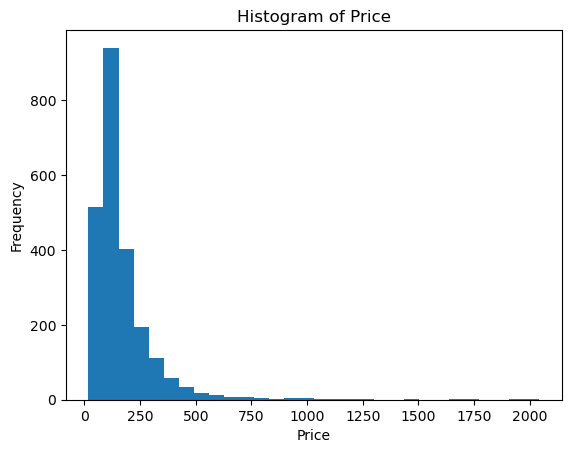

In [65]:
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()


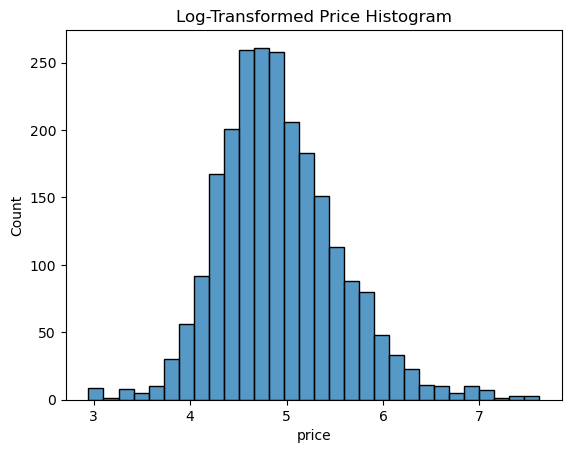

In [67]:
import numpy as np

sns.histplot(np.log1p(df['price']), bins=30)
plt.title('Log-Transformed Price Histogram')
plt.show()


In [69]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [71]:
X = df_encoded.drop(columns=['price'])
y = np.log1p(df_encoded['price'])   # log(1 + price)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression


In [77]:
model = LinearRegression()

In [79]:
model.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X)


In [81]:
from sklearn.metrics import mean_squared_error

In [85]:
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)


MSE: 0.3815016491944454


In [87]:
rmse = mean_squared_error(y, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 0.6176581977068267


In [89]:
#adding more models 

In [91]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}


In [93]:
#training the models in loop 

In [95]:
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name}: {score}")


Linear Regression: -0.0011553262862582514


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge Regression: 0.003232257931908511
Lasso Regression: 0.053026479306703234
Decision Tree: -0.04868870390328284
Random Forest: 0.3321442578495942
Support Vector Regressor: -0.017727180695057188


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name}: {score}")
    

In [99]:
from sklearn.metrics import mean_squared_error
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse
    })

results_df = pd.DataFrame(results)
print(results_df)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


                      Model       MSE      RMSE
0         Linear Regression  0.408222  0.638923
1          Ridge Regression  0.406433  0.637521
2          Lasso Regression  0.386129  0.621393
3             Decision Tree  0.455765  0.675104
4             Random Forest  0.272771  0.522275
5  Support Vector Regressor  0.414979  0.644189


In [104]:
#using cross validation to confirm the result of random forest 

In [103]:
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestRegressor(random_state=42)
rmse_scores = -cross_val_score(
    rf, X, y,
    scoring="neg_root_mean_squared_error",
    cv=5
)

print("CV RMSE:", rmse_scores.mean())


CV RMSE: 0.5186231528289504


In [107]:
#tunning the random forest model 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5
)

grid.fit(X_train, y_train)
print("Best RMSE:", -grid.best_score_)
